### Run the following lines in terminal to create MongoDB database and collections
```
mongoimport --db='influencers' --collection='instagram' --file=instagram_data_all-countries.csv  --drop --type=csv --headerline  
mongoimport --db='influencers' --collection='threads' --file=threads_data_all-countries.csv  --drop --type=csv --headerline  
mongoimport --db='influencers' --collection='tiktok' --file=tiktok_data_all-countries.csv  --drop --type=csv --headerline  
mongoimport --db='influencers' --collection='youtube' --file=youtube_data_all-countries.csv  --drop --type=csv --headerline
```

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import plotly.express as px
from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
#Instgram data for top 100 influvencers
IG_all_countries = Path("Data/instagram_data_all-countries.csv")
IG_all_countries = pd.read_csv(IG_all_countries)
pd.set_option('display.max_columns', None)
IG_all_countries

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Cristiano Ronaldo @cristiano,625.1M,0.01%,Portugal,Finance Soccer,187.5M
1,2,Leo Messi @leomessi,501.1M,0.01%,Argentina,Sports Soccer Activity General General Interest,150.3M
2,3,Selena Gomez @selenagomez,429.7M,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128.9M
3,4,Kylie @kyliejenner,400.5M,-,United States,Beauty and Self Care Product Showcase Modeling...,120.1M
4,5,Dwayne Johnson @therock,397.8M,0.13%,United States,Entertainment and Music Actors Public Figure,119.3M
...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55.3M,0.27%,India,Beauty and Self Care Modeling Actors Actor,16.6M
96,97,Burak Özdemir @cznburak,54.6M,0.03%,Turkey,Food Music Chef,16.4M
97,98,Larissa Manoela @larissamanoela,54.3M,0.21%,Brazil,Art Acting and Drama Fashion and Accessories E...,16.3M
98,99,HUDA BEAUTY @hudabeauty,54.1M,0.05%,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16.2M


In [5]:
# Threads data for top 100 influvencers
threads_all_countries = Path("Data/threads_data_all-countries.csv")
threads_all_countries = pd.read_csv(threads_all_countries)
pd.set_option('display.max_columns', None)
threads_all_countries

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,National Geographic @natgeo,4.9M,0.37%,NaN,Nature,1.5M
1,2,Jennifer Lopez @jlo,3.9M,0.33%,NaN,Entertainment & Music,1.2M
2,3,433 @433,3.8M,0.3%,NaN,Sports,1.1M
3,4,Ronaldo de Assis Moreira @ronaldinho,3M,0.6%,Brazil,Sports,898.1K
4,5,Pubity @pubity,2.8M,0.24%,NaN,Entertainment & Music,830.9K
...,...,...,...,...,...,...,...
95,96,Eliana Michaelichen @eliana,882.6K,0.36%,Brazil,Entertainment & Music,264.8K
96,97,Resiliência Humana @resiliencia_humana,871.9K,0.14%,NaN,Life & Society,261.6K
97,98,Juliana Paes @julianapaes,870.8K,0.09%,NaN,Education Romance & Wedding Entertainment & Music,261.2K
98,99,NATTI NATASHA @nattinatasha,867.4K,0.37%,NaN,Music,260.2K


In [6]:
# TikTok data for top 100 influvencers
tiktok_all_countries = Path("Data/tiktok_data_all-countries.csv")
tiktok_all_countries = pd.read_csv(tiktok_all_countries)
pd.set_option('display.max_columns', None)
tiktok_all_countries

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Khabane lame @khaby.lame,161.9M,0.2%,Italy,Funny Entertainment and Music,48.6M
1,2,Bella Poarch @bellapoarch,92.6M,0.8%,United States,NaN,27.8M
2,3,Addison Rae @addisonre,88.5M,1%,United States,Beauty and Self Care,26.6M
3,4,MrBeast @mrbeast,85.4M,4%,NaN,Entertainment and Music,25.6M
4,5,Zach King @zachking,78.1M,2.9%,United States,Entertainment and Music,23.4M
...,...,...,...,...,...,...,...
95,96,Bryce Hall @brycehall,21.5M,-,United States,Entertainment and Music,6.5M
96,97,온오빠 On Oppa @korea.on,21.5M,-,NaN,Entertainment and Music,6.5M
97,98,Seany @seandoesmagic,21.3M,-,NaN,NaN,6.4M
98,99,Pk @pkllipe,21.3M,2.6%,NaN,NaN,6.4M


In [7]:
# Youtube data for top 100 influvencers
youtube_all_countries = Path("Data/tiktok_data_all-countries.csv")
youtube_all_countries = pd.read_csv(youtube_all_countries)
pd.set_option('display.max_columns', None)
youtube_all_countries

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Khabane lame @khaby.lame,161.9M,0.2%,Italy,Funny Entertainment and Music,48.6M
1,2,Bella Poarch @bellapoarch,92.6M,0.8%,United States,NaN,27.8M
2,3,Addison Rae @addisonre,88.5M,1%,United States,Beauty and Self Care,26.6M
3,4,MrBeast @mrbeast,85.4M,4%,NaN,Entertainment and Music,25.6M
4,5,Zach King @zachking,78.1M,2.9%,United States,Entertainment and Music,23.4M
...,...,...,...,...,...,...,...
95,96,Bryce Hall @brycehall,21.5M,-,United States,Entertainment and Music,6.5M
96,97,온오빠 On Oppa @korea.on,21.5M,-,NaN,Entertainment and Music,6.5M
97,98,Seany @seandoesmagic,21.3M,-,NaN,NaN,6.4M
98,99,Pk @pkllipe,21.3M,2.6%,NaN,NaN,6.4M


In [8]:
# Add a new column indicating the source
IG_all_countries['Social Media Platform'] = 'Instagram'
threads_all_countries['Social Media Platform'] = 'Threads'
tiktok_all_countries['Social Media Platform'] = 'TikTok'
youtube_all_countries['Social Media Platform'] = 'YouTube'

In [9]:
# Concatenate DataFrames vertically
merged_df = pd.concat([IG_all_countries, threads_all_countries, tiktok_all_countries, youtube_all_countries], ignore_index=True)
merged_df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform
0,1,Cristiano Ronaldo @cristiano,625.1M,0.01%,Portugal,Finance Soccer,187.5M,Instagram
1,2,Leo Messi @leomessi,501.1M,0.01%,Argentina,Sports Soccer Activity General General Interest,150.3M,Instagram
2,3,Selena Gomez @selenagomez,429.7M,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128.9M,Instagram
3,4,Kylie @kyliejenner,400.5M,-,United States,Beauty and Self Care Product Showcase Modeling...,120.1M,Instagram
4,5,Dwayne Johnson @therock,397.8M,0.13%,United States,Entertainment and Music Actors Public Figure,119.3M,Instagram
...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21.5M,-,United States,Entertainment and Music,6.5M,YouTube
396,97,온오빠 On Oppa @korea.on,21.5M,-,NaN,Entertainment and Music,6.5M,YouTube
397,98,Seany @seandoesmagic,21.3M,-,NaN,NaN,6.4M,YouTube
398,99,Pk @pkllipe,21.3M,2.6%,NaN,NaN,6.4M,YouTube


In [10]:
# Checking data types 
merged_df.dtypes

#                         int64
NAME                     object
FOLLOWERS                object
ER                       object
COUNTRY                  object
TOPIC OF INFLUENCE       object
POTENTIAL REACH          object
Social Media Platform    object
dtype: object

In [11]:
# Function to convert followers to numeric format
def convert_followers(followers):
    if 'M' in followers:
        return float(followers.replace('M', '')) * 1e6
    elif 'K' in followers:
        return float(followers.replace('K', '')) * 1e3
    else:
        return float(followers)

# Convert "FOLLOWERS" column to numeric values
merged_df["FOLLOWERS"] = merged_df["FOLLOWERS"].apply(convert_followers)
merged_df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01%,Portugal,Finance Soccer,187.5M,Instagram
1,2,Leo Messi @leomessi,501100000.0,0.01%,Argentina,Sports Soccer Activity General General Interest,150.3M,Instagram
2,3,Selena Gomez @selenagomez,429700000.0,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128.9M,Instagram
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120.1M,Instagram
4,5,Dwayne Johnson @therock,397800000.0,0.13%,United States,Entertainment and Music Actors Public Figure,119.3M,Instagram
...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21500000.0,-,United States,Entertainment and Music,6.5M,YouTube
396,97,온오빠 On Oppa @korea.on,21500000.0,-,NaN,Entertainment and Music,6.5M,YouTube
397,98,Seany @seandoesmagic,21300000.0,-,NaN,NaN,6.4M,YouTube
398,99,Pk @pkllipe,21300000.0,2.6%,NaN,NaN,6.4M,YouTube


In [12]:
# Function to convert potential reach to numeric format
def convert_potential_reach(reach):
    if 'M' in reach:
        return float(reach.replace('M', '')) * 1e6
    elif 'K' in reach:
        return float(reach.replace('K', '')) * 1e3
    else:
        return float(reach)

# Convert "POTENTIAL REACH" column to numeric values
merged_df["POTENTIAL REACH"] = merged_df["POTENTIAL REACH"].apply(convert_potential_reach)
merged_df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01%,Portugal,Finance Soccer,187500000.0,Instagram
1,2,Leo Messi @leomessi,501100000.0,0.01%,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram
2,3,Selena Gomez @selenagomez,429700000.0,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram
4,5,Dwayne Johnson @therock,397800000.0,0.13%,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram
...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21500000.0,-,United States,Entertainment and Music,6500000.0,YouTube
396,97,온오빠 On Oppa @korea.on,21500000.0,-,NaN,Entertainment and Music,6500000.0,YouTube
397,98,Seany @seandoesmagic,21300000.0,-,NaN,NaN,6400000.0,YouTube
398,99,Pk @pkllipe,21300000.0,2.6%,NaN,NaN,6400000.0,YouTube


In [13]:
#Checking data types again 
merged_df.dtypes

#                          int64
NAME                      object
FOLLOWERS                float64
ER                        object
COUNTRY                   object
TOPIC OF INFLUENCE        object
POTENTIAL REACH          float64
Social Media Platform     object
dtype: object

In [14]:
# List unique values of "TOPIC OF INFLUENCE" 
merged_df["TOPIC OF INFLUENCE"].unique()

array(['Finance Soccer',
       'Sports Soccer Activity General General Interest',
       'Beauty and Self Care Entertainment and Music Music Actors',
       'Beauty and Self Care Product Showcase Modeling Public Figure',
       'Entertainment and Music Actors Public Figure',
       'Entertainment and Music Music Singer Actors',
       'Fashion and Accessories Beauty and Self Care Actors Public Figure',
       'Music Singer', 'Fashion and Accessories Modeling Public Figure',
       'Food Fashion and Accessories Modeling Fashion Model',
       'Entertainment and Music Music Singer Musician',
       'Entertainment and Music Music Singer Songwriting',
       'Sports Cricket Athlete',
       'Art Food and Drink Entertainment and Music Celebrity',
       'Fashion and Accessories Singer Artist',
       'Entertainment and Music Business and Finance Modeling Actors',
       'Sports Soccer Athlete', 'Music',
       'Entertainment and Music Music Singer Bands Musicians',
       'Entertainment an

In [15]:
# Mapping dictionary for categories and subcategories
category_mapping = {
    'Sports': ['Soccer', 'Basketball', 'Cricket', 'Athlete'],
    'Entertainment': ['Music', 'Actors', 'Celebrity', 'Comedian', 'TV Shows', 'Film'],
    'Fashion and Accessories': ['Fashion', 'Modeling', 'Singer', 'Artist', 'TV Host'],
    'Beauty and Self Care': ['Beauty', 'Modeling', 'Hair & Beauty', 'Blogger'],
    'Food and Drink': ['Food', 'Chef'],
    'Art': ['Art', 'Modeling', 'Artist', 'Entertainment'],
    'Politics': ['Politics'],
    'Technology': ['Modeling', 'Scientist'],
    'Books': ['Lifestyle', 'Author'],
    'Shopping': ['Shopping'],
    'Pets': ['Pets']
}

# Function to map "TOPIC OF INFLUENCE" to category and subcategory
def map_to_category(topic):
    if pd.isna(topic):  # Check if Nan
        return np.nan, np.nan
    for category, subcategories in category_mapping.items():
        for subcategory in subcategories:
            if subcategory in topic:
                return category, subcategory
    return np.nan, np.nan
# Apply mapping function to create new columns
merged_df[['CATEGORY', 'SUB-CATEGORY']] = merged_df['TOPIC OF INFLUENCE'].apply(lambda x: pd.Series(map_to_category(x)))
merged_df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform,CATEGORY,SUB-CATEGORY
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01%,Portugal,Finance Soccer,187500000.0,Instagram,Sports,Soccer
1,2,Leo Messi @leomessi,501100000.0,0.01%,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram,Sports,Soccer
2,3,Selena Gomez @selenagomez,429700000.0,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram,Entertainment,Music
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram,Fashion and Accessories,Modeling
4,5,Dwayne Johnson @therock,397800000.0,0.13%,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram,Entertainment,Music
...,...,...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21500000.0,-,United States,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
396,97,온오빠 On Oppa @korea.on,21500000.0,-,NaN,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
397,98,Seany @seandoesmagic,21300000.0,-,NaN,NaN,6400000.0,YouTube,NaN,NaN
398,99,Pk @pkllipe,21300000.0,2.6%,NaN,NaN,6400000.0,YouTube,NaN,NaN


In [16]:
# Rename the "ER" column to "Engagement Rate"
merged_df = merged_df.rename(columns={"ER": "ENGAGEMENT RATE"})
merged_df

,#,NAME,FOLLOWERS,ENGAGEMENT RATE,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform,CATEGORY,SUB-CATEGORY
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01%,Portugal,Finance Soccer,187500000.0,Instagram,Sports,Soccer
1,2,Leo Messi @leomessi,501100000.0,0.01%,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram,Sports,Soccer
2,3,Selena Gomez @selenagomez,429700000.0,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram,Entertainment,Music
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram,Fashion and Accessories,Modeling
4,5,Dwayne Johnson @therock,397800000.0,0.13%,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram,Entertainment,Music
...,...,...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21500000.0,-,United States,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
396,97,온오빠 On Oppa @korea.on,21500000.0,-,NaN,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
397,98,Seany @seandoesmagic,21300000.0,-,NaN,NaN,6400000.0,YouTube,NaN,NaN
398,99,Pk @pkllipe,21300000.0,2.6%,NaN,NaN,6400000.0,YouTube,NaN,NaN


c:\Users\olivi\anaconda3\envs\myfirstpythonenv\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from current font.
c:\Users\olivi\anaconda3\envs\myfirstpythonenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


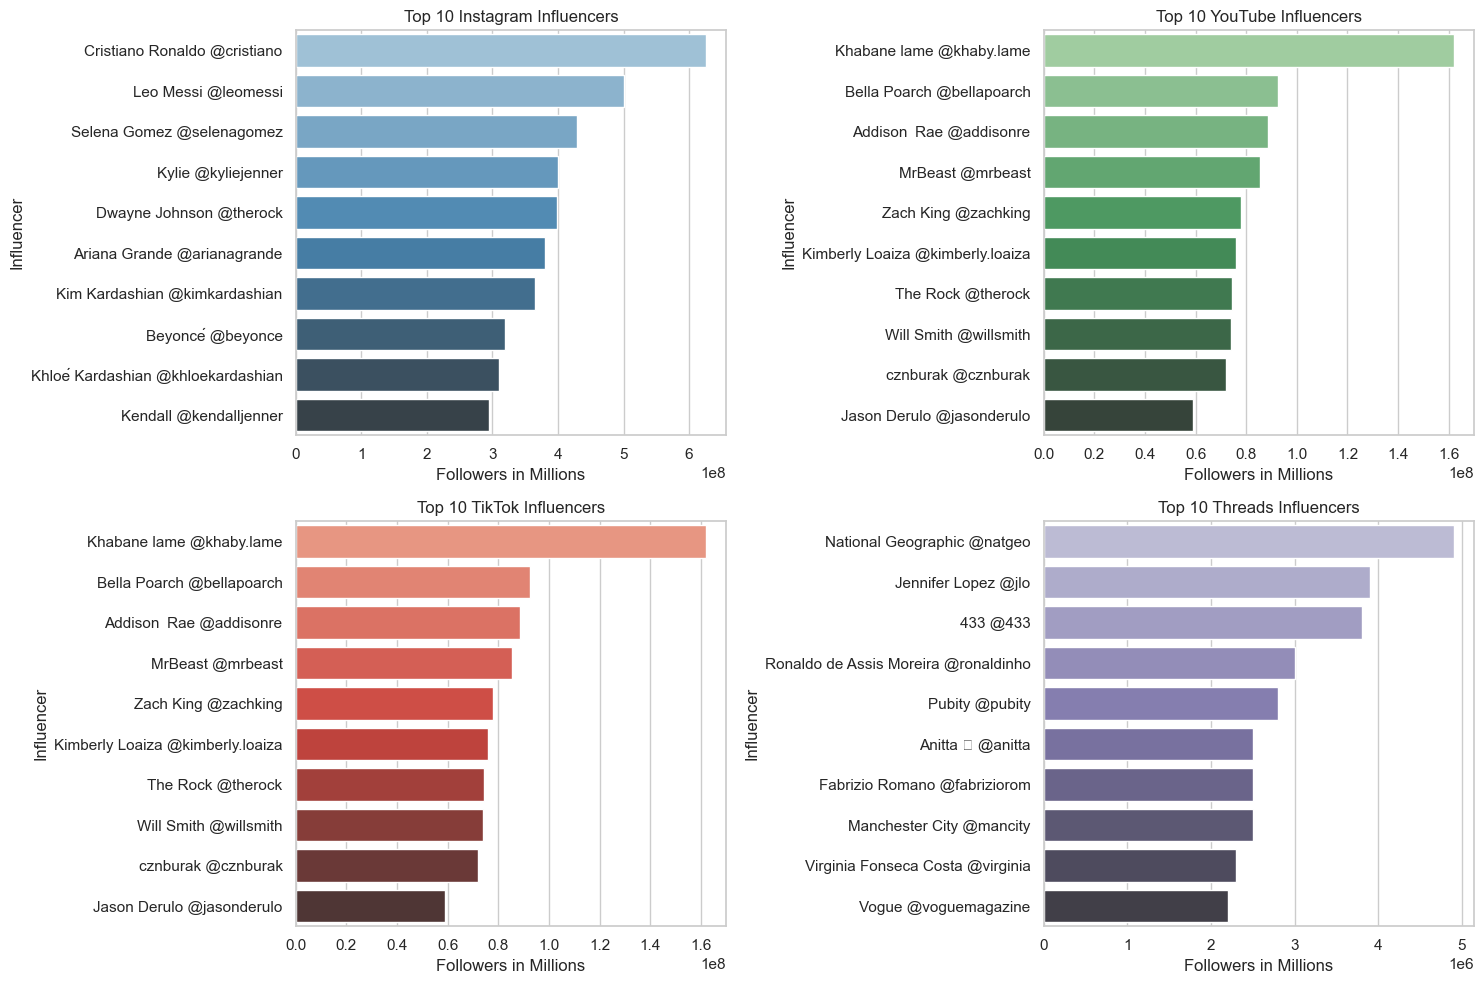

In [17]:
# Get top 10 influencers for each social media platform
top_10_instagram = merged_df[merged_df['Social Media Platform'] == 'Instagram'].nlargest(10, 'FOLLOWERS')
top_10_youtube = merged_df[merged_df['Social Media Platform'] == 'YouTube'].nlargest(10, 'FOLLOWERS')
top_10_tiktok = merged_df[merged_df['Social Media Platform'] == 'TikTok'].nlargest(10, 'FOLLOWERS')
top_10_threads = merged_df[merged_df['Social Media Platform'] == 'Threads'].nlargest(10, 'FOLLOWERS')

# Plotting top 10 influencers for each platform
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Instagram
sns.barplot(x='FOLLOWERS', y='NAME', data=top_10_instagram, ax=axs[0, 0], palette='Blues_d')
axs[0, 0].set_title('Top 10 Instagram Influencers')
axs[0, 0].set_xlabel('Followers in Millions')
axs[0, 0].set_ylabel('Influencer')

# YouTube
sns.barplot(x='FOLLOWERS', y='NAME', data=top_10_youtube, ax=axs[0, 1], palette='Greens_d')
axs[0, 1].set_title('Top 10 YouTube Influencers')
axs[0, 1].set_xlabel('Followers in Millions')
axs[0, 1].set_ylabel('Influencer')

# TikTok
sns.barplot(x='FOLLOWERS', y='NAME', data=top_10_tiktok, ax=axs[1, 0], palette='Reds_d')
axs[1, 0].set_title('Top 10 TikTok Influencers')
axs[1, 0].set_xlabel('Followers in Millions')
axs[1, 0].set_ylabel('Influencer')

# Threads
sns.barplot(x='FOLLOWERS', y='NAME', data=top_10_threads, ax=axs[1, 1], palette='Purples_d')
axs[1, 1].set_title('Top 10 Threads Influencers')
axs[1, 1].set_xlabel('Followers in Millions')
axs[1, 1].set_ylabel('Influencer')

plt.tight_layout()
plt.show()

In [18]:
# Filter out rows with NaN values in relevant columns
merged_df_clean = merged_df.dropna(subset=['COUNTRY', 'CATEGORY', 'SUB-CATEGORY', 'ENGAGEMENT RATE', 'POTENTIAL REACH', 'FOLLOWERS'])

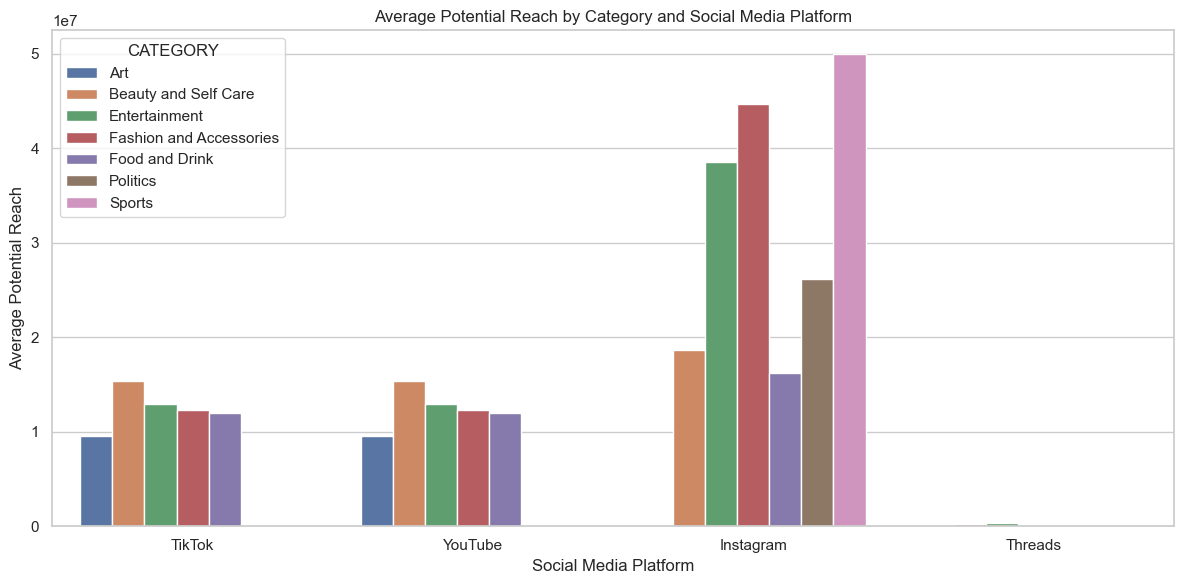

In [19]:
# Group by 'CATEGORY' and 'Social Media Platform', calculate mean potential reach
avg_potential_reach = merged_df_clean.groupby(['CATEGORY', 'Social Media Platform'])['POTENTIAL REACH'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Social Media Platform', y='POTENTIAL REACH', hue='CATEGORY', data=avg_potential_reach)

# Set labels and title
plt.xlabel('Social Media Platform')
plt.ylabel('Average Potential Reach')
plt.title('Average Potential Reach by Category and Social Media Platform')

# Show the plot
plt.tight_layout()
plt.show()

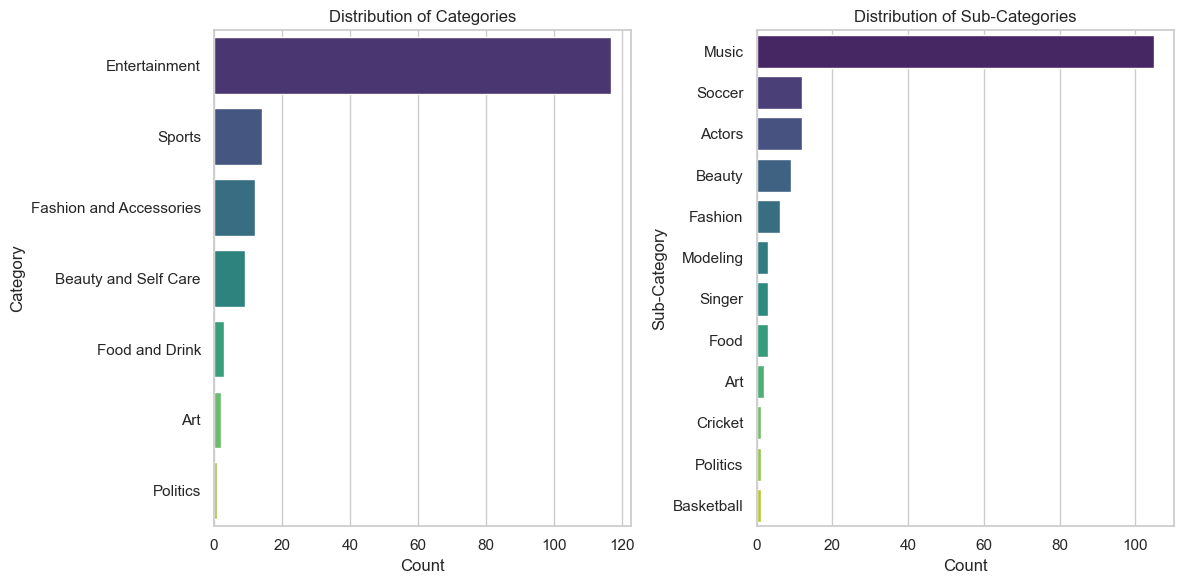

In [20]:
# Count the occurrences of each category
category_counts = merged_df_clean['CATEGORY'].value_counts()

# Count the occurrences of each sub-category
sub_category_counts = merged_df_clean['SUB-CATEGORY'].value_counts()

# Plot the bar chart for categories
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Categories')

# Plot the bar chart for sub-categories
plt.subplot(1, 2, 2)
sns.barplot(x=sub_category_counts.values, y=sub_category_counts.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Distribution of Sub-Categories')

plt.tight_layout()
plt.show()

In [21]:
# Replace '-' with NaN in the 'Engagement Rate' column
merged_df['ENGAGEMENT RATE'].replace('-', np.nan, inplace=True)

# Convert 'Engagement Rate' column to float
merged_df['ENGAGEMENT RATE'] = merged_df['ENGAGEMENT RATE'].str.replace('%', '').astype(float)

# Check the data types after conversion
print(merged_df.dtypes)

#                          int64
NAME                      object
FOLLOWERS                float64
ENGAGEMENT RATE          float64
COUNTRY                   object
TOPIC OF INFLUENCE        object
POTENTIAL REACH          float64
Social Media Platform     object
CATEGORY                  object
SUB-CATEGORY              object
dtype: object


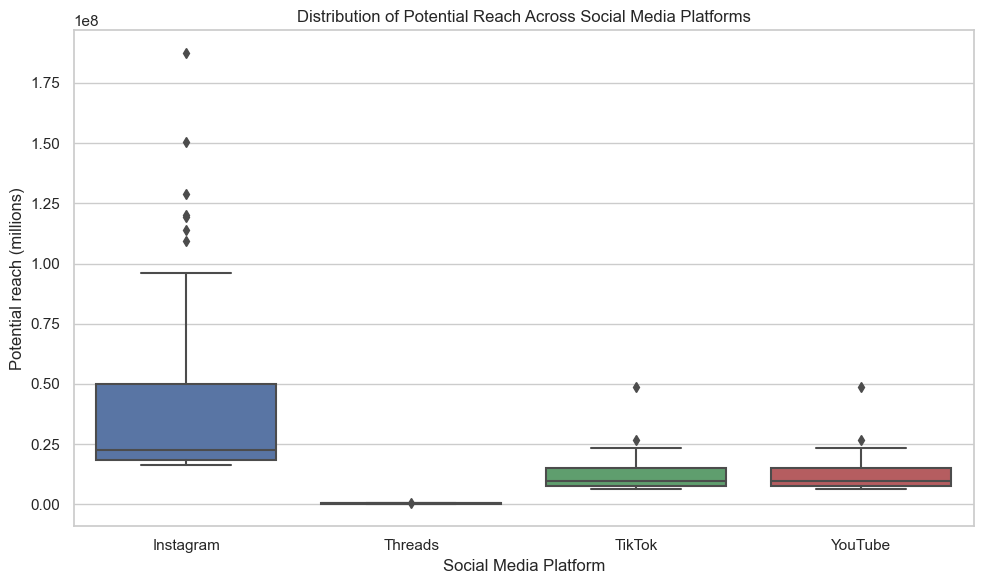

In [44]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Social Media Platform', y='POTENTIAL REACH', data=merged_df_clean)

# Set labels and title
plt.xlabel('Social Media Platform')
plt.ylabel('Potential reach (millions)')
plt.title('Distribution of Potential Reach Across Social Media Platforms')

# Show the plot
plt.tight_layout()
plt.show()

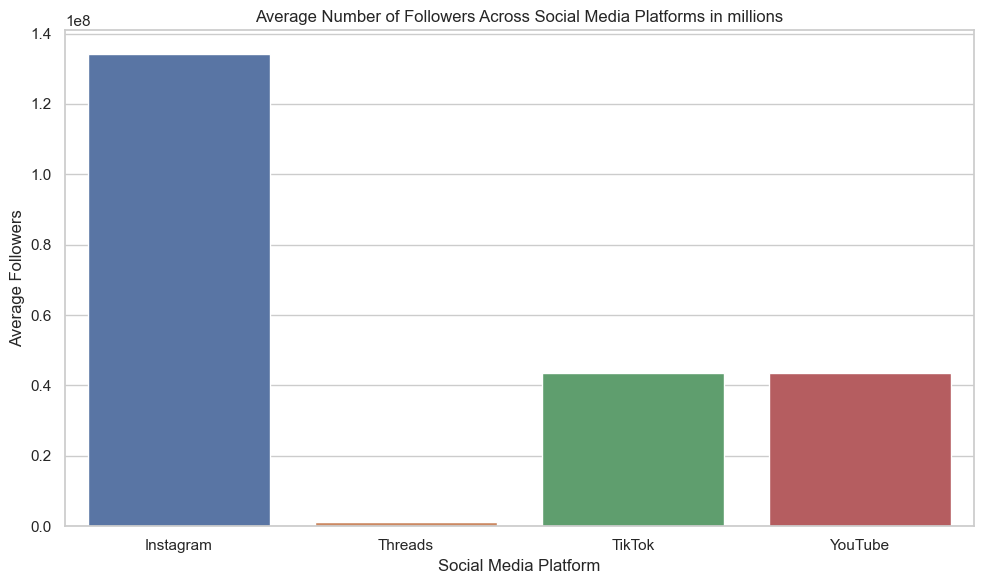

In [23]:
# Calculate average number of followers for each social media platform
average_followers = merged_df_clean.groupby('Social Media Platform')['FOLLOWERS'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Social Media Platform', y='FOLLOWERS', data=average_followers)

# Set labels and title
plt.xlabel('Social Media Platform')
plt.ylabel('Average Followers')
plt.title('Average Number of Followers Across Social Media Platforms in millions')

# Show the plot
plt.tight_layout()
plt.show()

In [24]:

# Create a world map with engagement rate as the color scale
fig = px.choropleth(merged_df, 
                    locations = 'COUNTRY',
                    locationmode='country names', 
                    color='ENGAGEMENT RATE', 
                    hover_name='COUNTRY', 
                    color_continuous_scale=px.colors.sequential.matter,
                    range_color=(merged_df['ENGAGEMENT RATE'].min(), merged_df['ENGAGEMENT RATE'].max()),
                    projection='natural earth')


# Update layout parameters to increase the size of the map
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)

# Show the plot
fig.show()

In [25]:
# Define the minimum and maximum values manually
min_value = 259899.99999999997
max_value = 187500000.0

In [26]:
# Create a world map with potential reach as the color scale
fig = px.choropleth(merged_df_clean, 
                    locations='COUNTRY',
                    locationmode='country names', 
                    color='POTENTIAL REACH', 
                    hover_name='COUNTRY', 
                    color_continuous_scale=px.colors.sequential.matter,
                    #range_color=(min_value, max_value),
                    projection='natural earth')


# Update layout parameters to increase the size of the map
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)

# Show the plot
fig.show()

In [27]:
# Create a scatter plot on the map
fig = px.scatter_geo(merged_df_clean, 
                      locations="COUNTRY", 
                      locationmode='country names',
                      color="FOLLOWERS",
                      hover_name="NAME",
                      size="FOLLOWERS",
                      projection="natural earth")

# Set the title
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)


# Show the plot
fig.show()

In [28]:
# Filter out rows with NaN values in relevant columns
merged_df_clean = merged_df.dropna(subset=['COUNTRY', 'CATEGORY', 'SUB-CATEGORY'])

# Create a Treemap
fig = px.treemap(merged_df_clean, 
                 path=['COUNTRY', 'CATEGORY', 'SUB-CATEGORY'], 
                 values='FOLLOWERS', 
                 color='FOLLOWERS',
                 color_continuous_scale=px.colors.sequential.Viridis,
                 title='Influencers Hierarchical Structure')

# Show the plot
fig.show()

In [29]:
# Splitting the 'NAME' column at '@' symbol and creating a new column called 'Handle'
merged_df['HANDLE'] = '@' + merged_df['NAME'].str.split('@').str[1]

# Displaying the modified DataFrame
merged_df

,#,NAME,FOLLOWERS,ENGAGEMENT RATE,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform,CATEGORY,SUB-CATEGORY,HANDLE
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01,Portugal,Finance Soccer,187500000.0,Instagram,Sports,Soccer,@cristiano
1,2,Leo Messi @leomessi,501100000.0,0.01,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram,Sports,Soccer,@leomessi
2,3,Selena Gomez @selenagomez,429700000.0,1.09,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram,Entertainment,Music,@selenagomez
3,4,Kylie @kyliejenner,400500000.0,NaN,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram,Fashion and Accessories,Modeling,@kyliejenner
4,5,Dwayne Johnson @therock,397800000.0,0.13,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram,Entertainment,Music,@therock
...,...,...,...,...,...,...,...,...,...,...,...
395,96,Bryce Hall @brycehall,21500000.0,NaN,United States,Entertainment and Music,6500000.0,YouTube,Entertainment,Music,@brycehall
396,97,온오빠 On Oppa @korea.on,21500000.0,NaN,NaN,Entertainment and Music,6500000.0,YouTube,Entertainment,Music,@korea.on
397,98,Seany @seandoesmagic,21300000.0,NaN,NaN,NaN,6400000.0,YouTube,NaN,NaN,@seandoesmagic
398,99,Pk @pkllipe,21300000.0,2.60,NaN,NaN,6400000.0,YouTube,NaN,NaN,@pkllipe


In [30]:
# Remove the handle from the 'NAME' column
merged_df['NAME'] = merged_df['NAME'].str.split('@').str[0]
merged_df

,#,NAME,FOLLOWERS,ENGAGEMENT RATE,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform,CATEGORY,SUB-CATEGORY,HANDLE
0,1,Cristiano Ronaldo,625100000.0,0.01,Portugal,Finance Soccer,187500000.0,Instagram,Sports,Soccer,@cristiano
1,2,Leo Messi,501100000.0,0.01,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram,Sports,Soccer,@leomessi
2,3,Selena Gomez,429700000.0,1.09,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram,Entertainment,Music,@selenagomez
3,4,Kylie,400500000.0,NaN,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram,Fashion and Accessories,Modeling,@kyliejenner
4,5,Dwayne Johnson,397800000.0,0.13,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram,Entertainment,Music,@therock
...,...,...,...,...,...,...,...,...,...,...,...
395,96,Bryce Hall,21500000.0,NaN,United States,Entertainment and Music,6500000.0,YouTube,Entertainment,Music,@brycehall
396,97,온오빠 On Oppa,21500000.0,NaN,NaN,Entertainment and Music,6500000.0,YouTube,Entertainment,Music,@korea.on
397,98,Seany,21300000.0,NaN,NaN,NaN,6400000.0,YouTube,NaN,NaN,@seandoesmagic
398,99,Pk,21300000.0,2.60,NaN,NaN,6400000.0,YouTube,NaN,NaN,@pkllipe


In [31]:
# Reorganize the DataFrame
merged_df = merged_df[['NAME', 'HANDLE', 'FOLLOWERS', 'ENGAGEMENT RATE', 'COUNTRY', 'TOPIC OF INFLUENCE', 'POTENTIAL REACH', 'Social Media Platform', 'CATEGORY', 'SUB-CATEGORY']]
merged_df

,NAME,HANDLE,FOLLOWERS,ENGAGEMENT RATE,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,Social Media Platform,CATEGORY,SUB-CATEGORY
0,Cristiano Ronaldo,@cristiano,625100000.0,0.01,Portugal,Finance Soccer,187500000.0,Instagram,Sports,Soccer
1,Leo Messi,@leomessi,501100000.0,0.01,Argentina,Sports Soccer Activity General General Interest,150300000.0,Instagram,Sports,Soccer
2,Selena Gomez,@selenagomez,429700000.0,1.09,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Instagram,Entertainment,Music
3,Kylie,@kyliejenner,400500000.0,NaN,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Instagram,Fashion and Accessories,Modeling
4,Dwayne Johnson,@therock,397800000.0,0.13,United States,Entertainment and Music Actors Public Figure,119300000.0,Instagram,Entertainment,Music
...,...,...,...,...,...,...,...,...,...,...
395,Bryce Hall,@brycehall,21500000.0,NaN,United States,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
396,온오빠 On Oppa,@korea.on,21500000.0,NaN,NaN,Entertainment and Music,6500000.0,YouTube,Entertainment,Music
397,Seany,@seandoesmagic,21300000.0,NaN,NaN,NaN,6400000.0,YouTube,NaN,NaN
398,Pk,@pkllipe,21300000.0,2.60,NaN,NaN,6400000.0,YouTube,NaN,NaN


In [25]:
# Export the DataFrame to a CSV file
merged_df.to_csv('Data/merged_df.csv', index=False)

# Create MongoDB database and collections

In [32]:
# connect to Mongo
client = MongoClient(port=27017)
# Select the database 
db = client['influencers']

In [33]:
collections = ['instagram', 'threads', 'youtube', 'tiktok']

In [34]:
# Access the Instagram collection
instagram_collection = db['instagram']
# Access the Threads collection
threads_collection = db['threads']
# Access the YouTube collection
youtube_collection = db['youtube']
# Access the TikTok collection
tiktok_collection = db['tiktok']
tiktok_collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'influencers'), 'tiktok')

In [35]:
# Perform operations on the collections
for document in instagram_collection.find():
    print(document)

{'_id': ObjectId('6615258d2104659b995ce9ff'), '#': 1, 'NAME': 'Cristiano Ronaldo @cristiano', 'FOLLOWERS': '625.1M', 'ER': '0.01%', 'COUNTRY': 'Portugal', 'TOPIC OF INFLUENCE': 'Finance Soccer', 'POTENTIAL REACH': '187.5M'}
{'_id': ObjectId('6615258d2104659b995cea00'), '#': 3, 'NAME': 'Selena Gomez @selenagomez', 'FOLLOWERS': '429.7M', 'ER': '1.09%', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Beauty and Self Care Entertainment and Music Music Actors', 'POTENTIAL REACH': '128.9M'}
{'_id': ObjectId('6615258d2104659b995cea01'), '#': 4, 'NAME': 'Kylie @kyliejenner', 'FOLLOWERS': '400.5M', 'ER': '-', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Beauty and Self Care Product Showcase Modeling Public Figure', 'POTENTIAL REACH': '120.1M'}
{'_id': ObjectId('6615258d2104659b995cea02'), '#': 5, 'NAME': 'Dwayne Johnson @therock', 'FOLLOWERS': '397.8M', 'ER': '0.13%', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Entertainment and Music Actors Public Figure', 'POTENTIAL REACH': '1

In [36]:
# Perform operations on the collections
for document in threads_collection.find():
    print(document)

{'_id': ObjectId('661525944c72517267b68a5f'), '#': 1, 'NAME': 'National Geographic @natgeo', 'FOLLOWERS': '4.9M', 'ER': '0.37%', 'COUNTRY': '', 'TOPIC OF INFLUENCE': 'Nature', 'POTENTIAL REACH': '1.5M'}
{'_id': ObjectId('661525944c72517267b68a60'), '#': 2, 'NAME': 'Jennifer Lopez @jlo', 'FOLLOWERS': '3.9M', 'ER': '0.33%', 'COUNTRY': '', 'TOPIC OF INFLUENCE': 'Entertainment & Music', 'POTENTIAL REACH': '1.2M'}
{'_id': ObjectId('661525944c72517267b68a61'), '#': 4, 'NAME': 'Ronaldo de Assis Moreira @ronaldinho', 'FOLLOWERS': '3M', 'ER': '0.6%', 'COUNTRY': 'Brazil', 'TOPIC OF INFLUENCE': 'Sports', 'POTENTIAL REACH': '898.1K'}
{'_id': ObjectId('661525944c72517267b68a62'), '#': 5, 'NAME': 'Pubity @pubity', 'FOLLOWERS': '2.8M', 'ER': '0.24%', 'COUNTRY': '', 'TOPIC OF INFLUENCE': 'Entertainment & Music', 'POTENTIAL REACH': '830.9K'}
{'_id': ObjectId('661525944c72517267b68a63'), '#': 10, 'NAME': 'Vogue @voguemagazine', 'FOLLOWERS': '2.2M', 'ER': '0.14%', 'COUNTRY': '', 'TOPIC OF INFLUENCE': 'Fa

In [37]:
# Perform operations on the collections
for document in youtube_collection.find():
    print(document)

{'_id': ObjectId('661525a2ae9afb9f5986b9b1'), '#': 1, 'NAME': 'T-Series @UCq-Fj5jknLsUf-MWSy4_brA', 'FOLLOWERS': '234M', 'ER': '-', 'COUNTRY': 'India', 'TOPIC OF INFLUENCE': '', 'POTENTIAL REACH': '70.2M'}
{'_id': ObjectId('661525a2ae9afb9f5986b9b2'), '#': 3, 'NAME': 'SET India @UCpEhnqL0y41EpW2TvWAHD7Q', 'FOLLOWERS': '139M', 'ER': '-', 'COUNTRY': 'India', 'TOPIC OF INFLUENCE': '', 'POTENTIAL REACH': '41.7M'}
{'_id': ObjectId('661525a2ae9afb9f5986b9b3'), '#': 2, 'NAME': 'Cocomelon - Nursery Rhymes @UCbCmjCuTUZos6Inko4u57UQ', 'FOLLOWERS': '144M', 'ER': '-', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': '', 'POTENTIAL REACH': '43.2M'}
{'_id': ObjectId('661525a2ae9afb9f5986b9b4'), '#': 5, 'NAME': 'MrBeast @UCX6OQ3DkcsbYNE6H8uQQuVA', 'FOLLOWERS': '100M', 'ER': '2.4%', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Celebrity Pets', 'POTENTIAL REACH': '30M'}
{'_id': ObjectId('661525a2ae9afb9f5986b9b5'), '#': 6, 'NAME': 'Like Nastya @UCJplp5SjeGSdVdwsfb9Q7lQ', 'FOLLOWERS': '97.3M', 'E

In [38]:
# Perform operations on the collections
for document in tiktok_collection.find():
    print(document)

{'_id': ObjectId('6615259adab61842f87f84a9'), '#': 1, 'NAME': 'Khabane lame @khaby.lame', 'FOLLOWERS': '161.9M', 'ER': '0.2%', 'COUNTRY': 'Italy', 'TOPIC OF INFLUENCE': 'Funny Entertainment and Music', 'POTENTIAL REACH': '48.6M'}
{'_id': ObjectId('6615259adab61842f87f84aa'), '#': 5, 'NAME': 'Zach King @zachking', 'FOLLOWERS': '78.1M', 'ER': '2.9%', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Entertainment and Music', 'POTENTIAL REACH': '23.4M'}
{'_id': ObjectId('6615259adab61842f87f84ab'), '#': 6, 'NAME': 'Kimberly Loaiza @kimberly.loaiza', 'FOLLOWERS': '76.1M', 'ER': '1.6%', 'COUNTRY': 'Mexico', 'TOPIC OF INFLUENCE': '', 'POTENTIAL REACH': '22.8M'}
{'_id': ObjectId('6615259adab61842f87f84ac'), '#': 7, 'NAME': 'The Rock @therock', 'FOLLOWERS': '74.2M', 'ER': '0.9%', 'COUNTRY': 'United States', 'TOPIC OF INFLUENCE': 'Entertainment and Music Fitness and Health Business and Finance', 'POTENTIAL REACH': '22.3M'}
{'_id': ObjectId('6615259adab61842f87f84ad'), '#': 8, 'NAME': 'Will Smi

In [39]:
# Get the follower count for each social media platform
def get_followers_total(collection):
    total_followers = 0
    for document in collection.find():
        followers_str = document['FOLLOWERS']
        if 'M' in followers_str:
            followers_number = float(followers_str.replace('M', ''))
            followers_number *= 1e6  
        elif 'K' in followers_str:
            followers_number = float(followers_str.replace('K', ''))
            followers_number *= 1e3  
        else:
            followers_number = float(followers_str)
        total_followers += followers_number
    return total_followers

In [40]:
# Get the total followers for each social media platform.
instagram_followers = get_followers_total(instagram_collection)
threads_followers = get_followers_total(threads_collection)
youtube_followers = get_followers_total(youtube_collection)
tiktok_followers = get_followers_total(tiktok_collection)

In [41]:
# Sort the dictionary by values in descending order.

total_followers = {
    'Instagram': instagram_followers,
    'Threads': threads_followers,
    'YouTube': youtube_followers,
    'TikTok': tiktok_followers
}
total_followers_sorted = dict(sorted(total_followers.items(), key=lambda item: item[1], reverse=True))

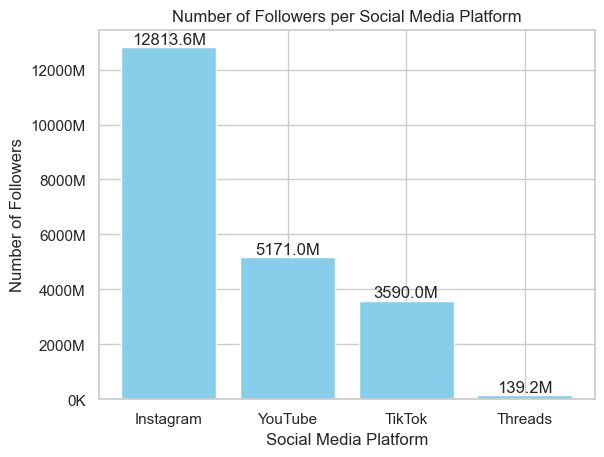

In [42]:
# Create the bar plot
bars = plt.bar(total_followers_sorted.keys(), total_followers_sorted.values(), color='skyblue')
# Add labels and title
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Followers')
plt.title('Number of Followers per Social Media Platform')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x * 1e-6) if x >= 1e6 else '{:.0f}K'.format(x * 1e-3)))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, '{:.1f}M'.format(yval * 1e-6), va='bottom', ha='center')
# Show the plot
plt.show()

In [43]:
# Close the database connection
client.close()